In [1]:
import scanpy as sc
import scFates as scf
sc.set_figure_params()

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
scf.set_figure_pubready()

In [2]:
adata_A=sc.read("data/adata_A.h5ad")
adata_B=sc.read("data/adata_B.h5ad")
adata_C=sc.read("data/adata_C.h5ad")

In [8]:
adata_C

AnnData object with n_obs × n_vars = 2005 × 4875
    obs: 'batch', 'plate', 'devtime', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden', 't', 'seg', 'edge', 'milestones', 'devtime_float'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'A->Ia<>Ib', 'dendro_segments', 'devtime_colors', 'doublets_colors', 'draw_graph', 'graph', 'leiden', 'leiden_colors', 'log1p', 'milestones_colors', 'neighbors', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list', 'tsne', 'umap'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_msdiff', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'fitted', 'palantir_imp', 'scaled'

In [10]:
import pandas as pd
writer = pd.ExcelWriter('data/fig3supp.xlsx', engine='xlsxwriter')
for b,adata,rm in zip(["A","B","C"],
                      [adata_A,adata_B,adata_C],
                      [("immature",["Ic","B"]),("A",["II","C"]),("A",["Ia","Ib"])]):
    scf.get.fork_stats(adata,rm[0],rm[1]).to_excel(writer,sheet_name="Bifurcation %s" %b)
    
writer.save()



In [4]:
r="immature"
m=["Ic","A"]

In [5]:
def generate_latex(adata,r,m,file):
    n="<>".join(m)

    df=adata.uns[f"{r}->{n}"]["fork"].copy()

    df.index="\textit{"+df.index+"}"

    eA=df.index[(df.module=="early") & (df.branch==m[0])]
    lA=df.index[(df.module=="late") & (df.branch==m[0])]
    eB=df.index[(df.module=="early") & (df.branch==m[1])]
    lB=df.index[(df.module=="late") & (df.branch==m[1])]

    import pandas as pd
    dat=pd.DataFrame({f'early {m[0]}': pd.Series(eA), 
                      f'late {m[0]}': pd.Series(lA),
                      f'early {m[1]}': pd.Series(eB),
                      f'late {m[1]}': pd.Series(lB)})

    dat=dat.fillna('')

    dat=dat.to_latex(index=False,header=True,escape=False)
    text_file = open(file, "w")
 
    #write string to file
    text_file.write(dat)

    #close file
    text_file.close()

In [6]:
adata_A.obs.seg.value_counts()

1    449
3    346
7    341
6    302
2    292
5    167
4    108
Name: seg, dtype: int64

In [7]:
generate_latex(adata_A,"immature",["Ic","B"],"table_A.txt")
generate_latex(adata_B,"A",["II","C"],"table_B.txt")
generate_latex(adata_C,"A",["Ia","Ib"],"table_C.txt")

In [18]:
fname="fig4"

In [12]:
import numpy as np
np.array((239, 245, 243))/255

np.array((232, 241, 248))/255

array([0.90980392, 0.94509804, 0.97254902])

In [20]:
%%bash -s $fname
echo $dat

cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=430mm,paperwidth=300mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}

\usepackage{booktabs}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}
\usepackage{tcolorbox}
\usepackage{makecell}

\definecolor{Acol}{rgb}{0.9372549 , 0.96078431, 0.95294118}

\definecolor{Bcol}{rgb}{0.96078431, 0.94117647, 0.968627458}

\definecolor{Ccol}{rgb}{0.90980392, 0.94509804, 0.97254902}

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{11pt}{11pt}\selectfont


\begin{minipage}[t]{.32\textwidth}
\vspace{0cm}
\begin{tcolorbox}[colback=Acol,left=0mm,right=0mm]

\begin{center}
\LARGE Bifurcation A


\normalsize Between Int. Ia/Ib/II-SGNs and Ic-SGNs
\end{center}
\vspace{-20pt}
\begin{center}
\includegraphics[width=\textwidth]{figures/slide_cors_fig4a.pdf}
\end{center}
\large
\vspace{-10pt}
\begin{center}
\footnotesize
EOF
cat table_A.txt >> $1.tex

cat<<EOF >>$1.tex
\end{center}
\includegraphics[width=\textwidth]{figures/modules_fig4a.pdf}
\end{tcolorbox}
\end{minipage}\hfill
\begin{minipage}[t]{.32\textwidth}
\vspace{0cm}
\begin{tcolorbox}[colback=Bcol,left=0mm,right=0mm]

\begin{center}
\LARGE Bifurcation B


\normalsize Between Int. Ia/Ib-SGNs and II-SGNs
\end{center}
\vspace{-20pt}
\begin{center}
\includegraphics[width=\textwidth]{figures/slide_cors_fig4b.pdf}
\end{center}
\large
\vspace{-10pt}
\begin{center}
\footnotesize
EOF
cat table_B.txt >> $1.tex

cat<<EOF >>$1.tex
\end{center}
\includegraphics[width=\textwidth]{figures/modules_fig4b.pdf}
\end{tcolorbox}
\end{minipage}\hfill
\begin{minipage}[t]{.32\textwidth}
\vspace{0cm}
\begin{tcolorbox}[colback=Ccol,left=0mm,right=0mm]

\begin{center}
\LARGE Bifurcation C


\normalsize Between Int. Ia-SGNs and Ib-SGNs
\end{center}
\vspace{-20pt}
\begin{center}
\includegraphics[width=\textwidth]{figures/slide_cors_fig4c.pdf}
\end{center}
\large
\vspace{-10pt}
\begin{center}
\footnotesize
EOF
cat table_C.txt >> $1.tex

cat<<EOF >>$1.tex
\end{center}
\includegraphics[width=\textwidth]{figures/modules_fig4c.pdf}
\end{tcolorbox}
\end{minipage}\hfill

\clearpage
EOF
echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg

identify $1.pdf


This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig4.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/booktabs/booktabs.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/

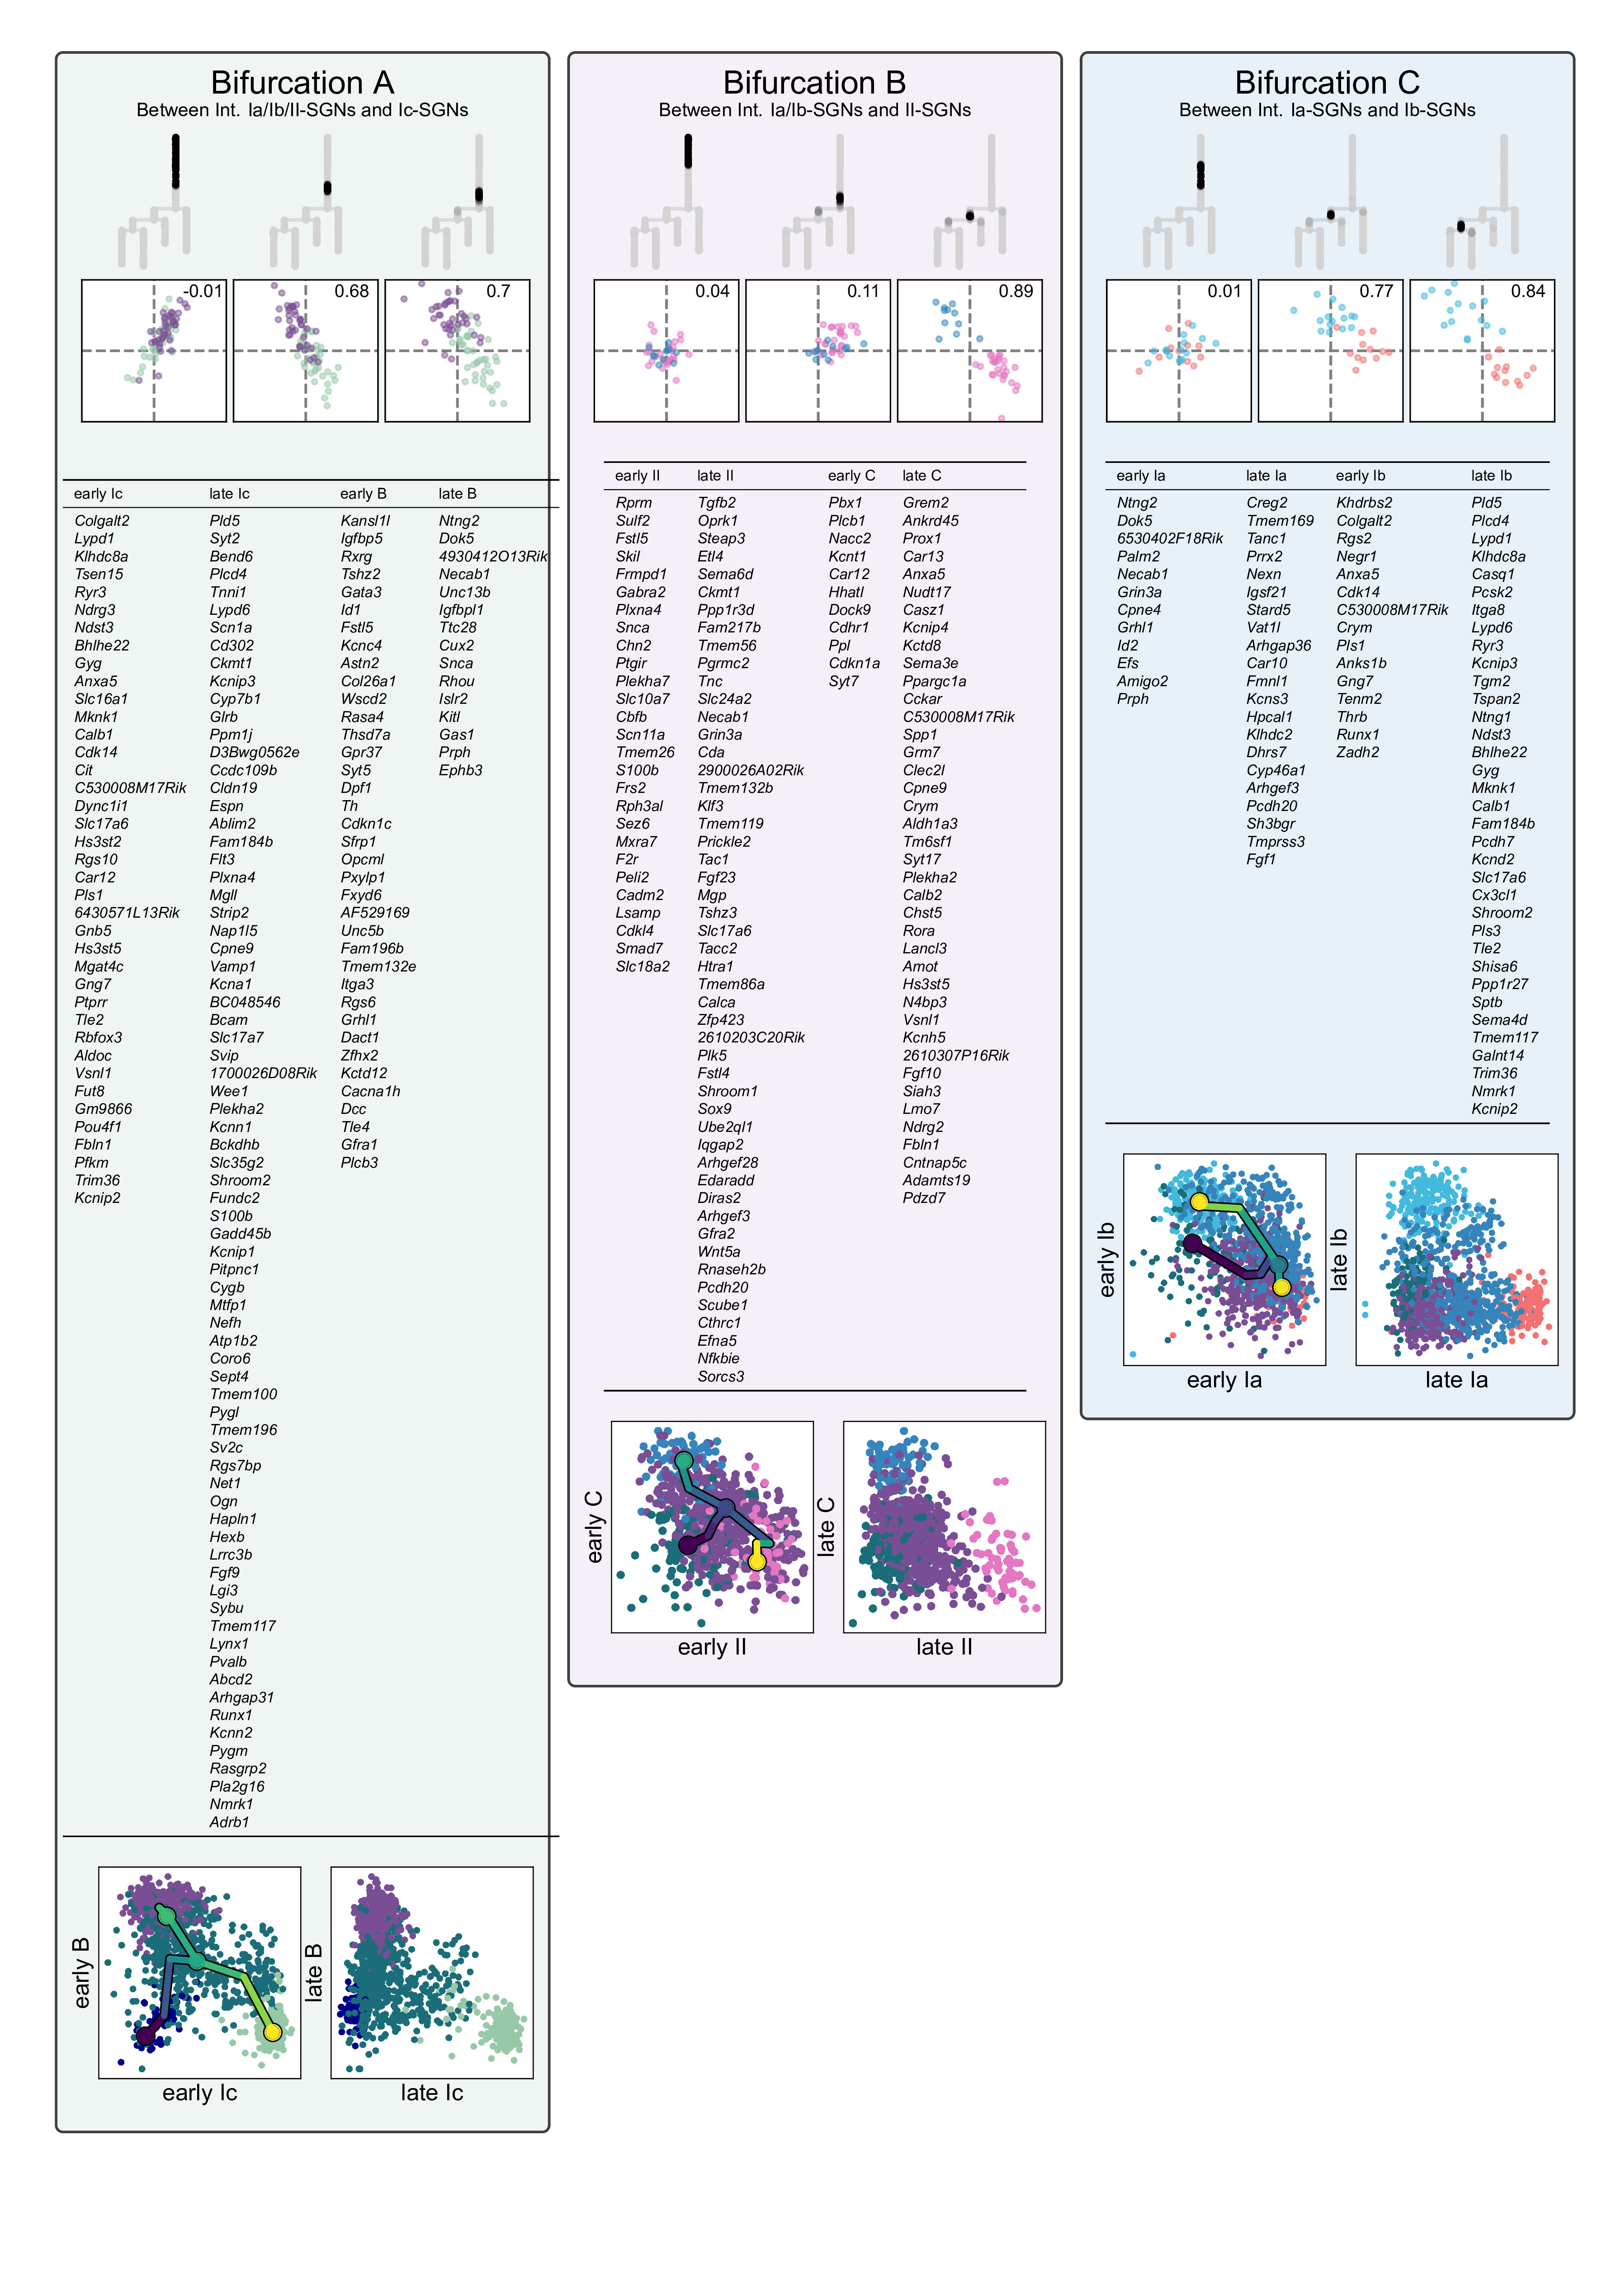

In [21]:
from IPython.display import Image
Image(filename=fname+'.jpg') 